Ethan Brinks
EET 4501
Assignment 2


Task 1

In [59]:
#load python library
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import random
import cv2

In [66]:
#read training dataset
reviews_train = []
data_path = './assignment2files/aclImdb/train'
for i in ['pos', 'neg']:
        for file_name in glob.iglob(os.path.join(data_path, i, '*.txt')):
                with open (file_name, 'r', encoding='utf-8') as f:
                        text_data = f.readline()
                #make a dict to store extracted data
                reviews_train.append({
                        'Review': text_data,
                        'sentiment': i
                })

In [73]:
#building the dataframe and changing the sentiment values from pos and neg to 1 and 0
train_df = pd.DataFrame(reviews_train)
train_df['sentiment']=train_df['sentiment'].map({'pos': 1, 'neg': 0})

In [76]:
#creating the csv for training data
train_df.to_csv('movie_train_data.csv', index=False, encoding='utf-8')

In [80]:
#navigating to training csv and printing first 3 lines
data_path = './venv/'
movie_train_data = open('movie_train_data.csv', 'r')
print(movie_train_data.readline())
print(movie_train_data.readline())
print(movie_train_data.readline())

Review,sentiment

"Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as ""Teachers"". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is ""Teachers"". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!",1

"Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who 

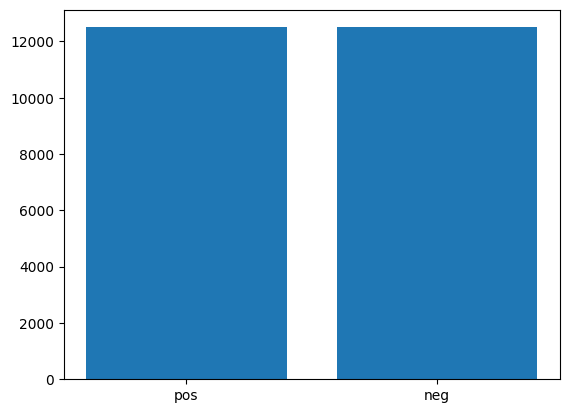

In [94]:
#finding training data for graph and plotting it
x = np.array(['pos', 'neg'])
training_pos_review_count = train_df[train_df['sentiment'] > 0]['Review'].count()
training_neg_review_count = train_df[train_df['sentiment'] < 1]['Review'].count()
y = np.array([training_pos_review_count, training_neg_review_count])

plt.bar(x, y)
plt.show()

In [81]:
#read testing dataset
reviews_test = []
data_path = './assignment2files/aclImdb/test'
for i in ['pos', 'neg']:
        for file_name in glob.iglob(os.path.join(data_path, i, '*.txt')):
                with open (file_name, 'r', encoding='utf-8') as f:
                        text_data = f.readline()
                #make a dict to store extracted data
                reviews_test.append({
                        'Review': text_data,
                        'sentiment': i
                })

In [82]:
#building the dataframe and changing the sentiment values from pos and neg to 1 and 0
test_df = pd.DataFrame(reviews_test)
test_df['sentiment']=test_df['sentiment'].map({'pos': 1, 'neg': 0})

In [83]:
#creating the csv for testing data
test_df.to_csv('movie_test_data.csv', index=False, encoding='utf-8')

In [84]:
#navigating to testing csv and printing first 3 lines
data_path = './venv/'
movie_test_data = open('movie_test_data.csv', 'r')
print(movie_test_data.readline())
print(movie_test_data.readline())
print(movie_test_data.readline())

Review,sentiment

"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.",1

"Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror ""Frailty"", with this family friendly sports drama about the 1913 U.S. Open where a young Americ

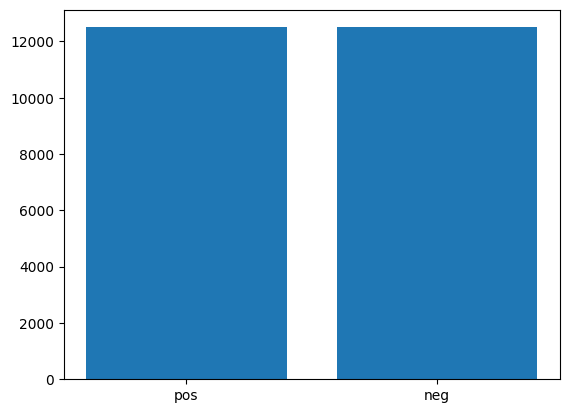

In [93]:
#finding testing data for graph and plotting it
x = np.array(['pos', 'neg'])
testing_pos_review_count = test_df[test_df['sentiment'] > 0]['Review'].count()
testing_neg_review_count = test_df[test_df['sentiment'] < 1]['Review'].count()
y = np.array([testing_pos_review_count, testing_neg_review_count])

plt.bar(x, y)
plt.show()

Task 2

In [38]:
#read Image dataset
images_matrix = []
data_path = './assignment2files/UCMerced_LandUse/Images'
for i in ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']:
        for file_name in glob.iglob(os.path.join(data_path, i, '*.tif')):
                with open (file_name, 'r', encoding='utf-8') as f:
                        image_data = Image.open(file_name)
                #store extracted data
                images_matrix.append({
                        'Image': image_data,
                        'Label': i
                })

In [78]:
#creates the training and testing arrays, shuffles the parent array, splits the parent array into a 70/30 split, and appends the correct amount to each array.
images_matrix_length = len(images_matrix)
images_train = []
images_test = []

random.shuffle(images_matrix)

split_index = images_matrix_length * 0.3
count = 0

for element in images_matrix:
        if count >= split_index:
               images_train.append(element)
        elif count < split_index:
               images_test.append(element)
        count = count + 1

In [79]:
#building image dataframes
image_train_df = pd.DataFrame(images_train)
image_test_df = pd.DataFrame(images_test)

In [80]:
#getting first 3 values from each dataframe
image_train_show = image_train_df['Image'].head(3)
image_test_show = image_test_df['Image'].head(3)

Training below:


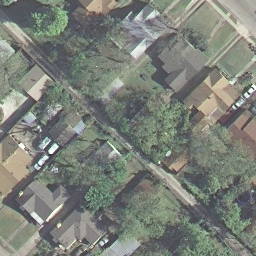

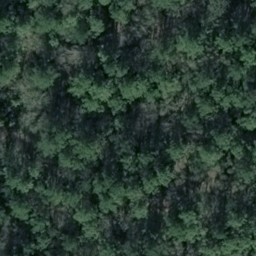

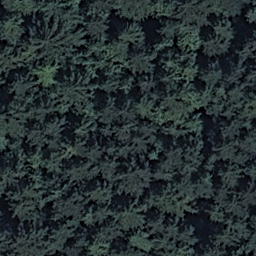

Testing below:


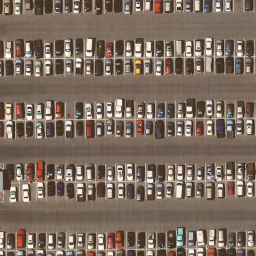

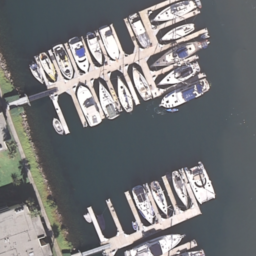

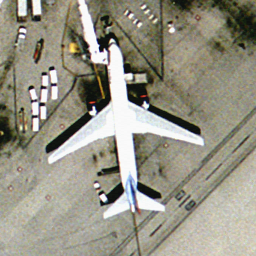

In [81]:
#displays the first 3 images from train and test
print('Training below:')
display(image_train_show[0])
display(image_train_show[1])
display(image_train_show[2])
print('Testing below:')
display(image_test_show[0])
display(image_test_show[1])
display(image_test_show[2])

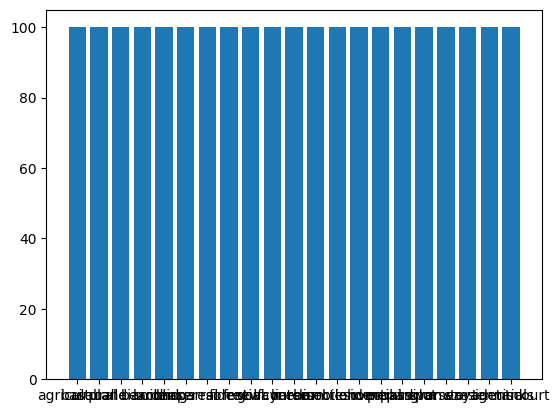

In [88]:
#finding testing data for graph and plotting it (also could not figure out how to turn the x-axis labels vertical)
frames = [image_train_df, image_test_df]
total_image_df = pd.concat(frames)

x = np.array(['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt'])

image_agri_count = total_image_df[total_image_df['Label'] == 'agricultural']['Image'].count()
image_airp_count = total_image_df[total_image_df['Label'] == 'airplane']['Image'].count()
image_base_count = total_image_df[total_image_df['Label'] == 'baseballdiamond']['Image'].count()
image_beac_count = total_image_df[total_image_df['Label'] == 'beach']['Image'].count()
image_buil_count = total_image_df[total_image_df['Label'] == 'buildings']['Image'].count()
image_chap_count = total_image_df[total_image_df['Label'] == 'chaparral']['Image'].count()
image_dens_count = total_image_df[total_image_df['Label'] == 'denseresidential']['Image'].count()
image_fore_count = total_image_df[total_image_df['Label'] == 'forest']['Image'].count()
image_free_count = total_image_df[total_image_df['Label'] == 'freeway']['Image'].count()
image_golf_count = total_image_df[total_image_df['Label'] == 'golfcourse']['Image'].count()
image_harb_count = total_image_df[total_image_df['Label'] == 'harbor']['Image'].count()
image_inte_count = total_image_df[total_image_df['Label'] == 'intersection']['Image'].count()
image_medi_count = total_image_df[total_image_df['Label'] == 'mediumresidential']['Image'].count()
image_mobi_count = total_image_df[total_image_df['Label'] == 'mobilehomepark']['Image'].count()
image_over_count = total_image_df[total_image_df['Label'] == 'overpass']['Image'].count()
image_park_count = total_image_df[total_image_df['Label'] == 'parkinglot']['Image'].count()
image_rive_count = total_image_df[total_image_df['Label'] == 'river']['Image'].count()
image_runw_count = total_image_df[total_image_df['Label'] == 'runway']['Image'].count()
image_spar_count = total_image_df[total_image_df['Label'] == 'sparseresidential']['Image'].count()
image_stor_count = total_image_df[total_image_df['Label'] == 'storagetanks']['Image'].count()
image_tenn_count = total_image_df[total_image_df['Label'] == 'tenniscourt']['Image'].count()

y = np.array([image_agri_count, image_airp_count, image_base_count, image_beac_count, image_buil_count, image_chap_count, image_dens_count, image_fore_count, image_free_count, image_golf_count, image_harb_count, image_inte_count, image_medi_count, image_mobi_count, image_over_count, image_park_count, image_rive_count, image_runw_count, image_spar_count, image_stor_count, image_tenn_count])

plt.bar(x, y)
plt.show()